# 1. Business Understanding

pada tahap ini dibutuhkan pemahaman tentang data yang relevan dengan bisnis, termasuk sumber data, jenis data , dan cara mengumpulkan atau mengelola, dan menganalisis data tersebut untuk tujuan bisnis.

problem : Terdapat banyak rumah/apartemen yang ada di london dengan luas dan besar rumah yang berbeda dan harga yang berbeda juga hal ini cukup menyulitkan pembeli untuk menentukan perkiraan harga yang tepat

tujuan : Bertujuan untuk mengetahui estimasi harga rumah/apartmen berdasarkan jumlah luas persegi, jumlah kamar tidur dan jumlah kamar mandi, agar pelanggan memiliki gambaran tentang harga rumah/apartment tersebut

dataset didapat dari kaggle.com (https://www.kaggle.com/datasets/arnavkulkarni/housing-prices-in-london)

# 2. Data Understanding

data understanding berisi tentang pengolahan data yang akan digunakan untuk proses analisis.pada data yang didapat terdapat 10 kolom dengan atribut sebagai berikut:

• Property Name - object

• Price - int64

• House Type - object

• Area in sq ft - int64

• No. of Bedrooms - int64

• No. of Bathrooms - int64

• No. of Receptions - int64

• Location - object

• City/County - object

• Postal Code - object






# 3. Data Preparation

Pada tahap ini data yang telah didapat akan diolah dan dipilih lagi agar sesuai dengan analisis. pada data yang saya dapat diambil tipe rumah, jumlah bedroom dan jumlah bathroom sebagai inputan untuk mengetahui estimasi harga rumah/apartment

# 4. Modelling

modelling digunakan untuk proses membangun model matematika atau statistika yang bertujuan untuk menjelaskan atau memprediksi hubungan antara variabel dalam data. dalam kasus ini saya menggunakan model regresi linear untuk menentukan estimasi harga rumah/apartment

# 5. Evaluasi

Setelah tahap modelling selesai selanjutnya tahapan evaluasi, pada tahapan ini dilakukan pengukuran dan penilaian hasil kerja suatu program agar hasil yang diharapkan dapat sesuai dengan tujuan yang dicapai dan memastikan program dapat berjalan dengan efektif dan efisien

# deskripsi library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [2]:
df = pd.read_csv('London.csv')

# Deskripsi Dataset

In [3]:
df.head()

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,Bedrooms,Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3480 non-null   int64 
 1   Property Name      3480 non-null   object
 2   Price              3480 non-null   int64 
 3   House Type         3480 non-null   object
 4   Area in sq ft      3480 non-null   int64 
 5   Bedrooms           3480 non-null   int64 
 6   Bathrooms          3480 non-null   int64 
 7   No. of Receptions  3480 non-null   int64 
 8   Location           2518 non-null   object
 9   City/County        3479 non-null   object
 10  Postal Code        3479 non-null   object
dtypes: int64(6), object(5)
memory usage: 299.2+ KB


<Axes: >

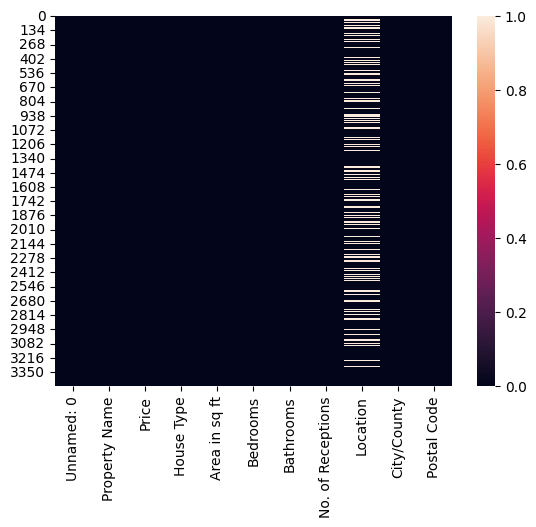

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.describe()

,Unnamed: 0,Price,Area in sq ft,Bedrooms,Bathrooms,No. of Receptions
count,3480.000000,3.480000e+03,3480.000000,3480.000000,3480.000000,3480.000000
mean,1739.500000,1.864173e+06,1712.973563,3.103736,3.103736,3.103736
std,1004.733796,2.267283e+06,1364.259351,1.517698,1.517698,1.517698
min,0.000000,1.800000e+05,274.000000,0.000000,0.000000,0.000000
25%,869.750000,7.500000e+05,834.000000,2.000000,2.000000,2.000000
50%,1739.500000,1.220000e+06,1310.000000,3.000000,3.000000,3.000000
75%,2609.250000,2.150000e+06,2157.250000,4.000000,4.000000,4.000000
max,3479.000000,3.975000e+07,15405.000000,10.000000,10.000000,10.000000


# Visualisasi Data

C:\Users\ACER\AppData\Local\Temp\ipykernel_3760\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

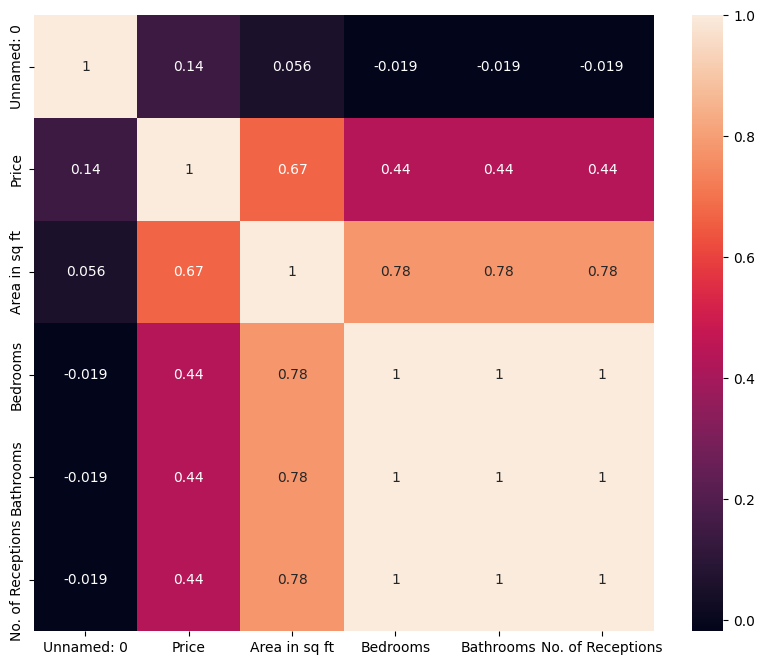

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Jumlah Tipe rumah berdasarkan meter persegi

In [8]:
models = df.groupby('House Type').count()[['Area in sq ft']].sort_values(by='Area in sq ft',ascending=True).reset_index()
models = models.rename(columns={'Area in sq ft':'numberOfType'})

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Mews'),
  Text(1, 0, 'Duplex'),
  Text(2, 0, 'Bungalow'),
  Text(3, 0, 'Studio'),
  Text(4, 0, 'Penthouse'),
  Text(5, 0, 'New development'),
  Text(6, 0, 'House'),
  Text(7, 0, 'Flat / Apartment')])

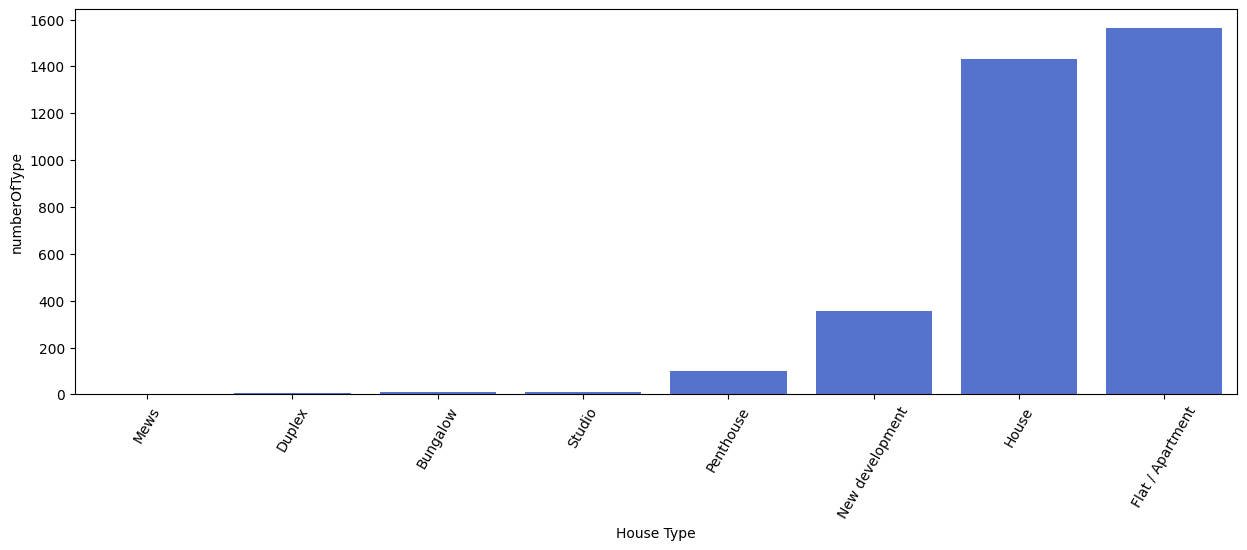

In [9]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['House Type'], y=models['numberOfType'], color='royalblue')
plt.xticks(rotation=60)

# distribusi harga Rumah/Apartmen

C:\Users\ACER\AppData\Local\Temp\ipykernel_3760\1954555324.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

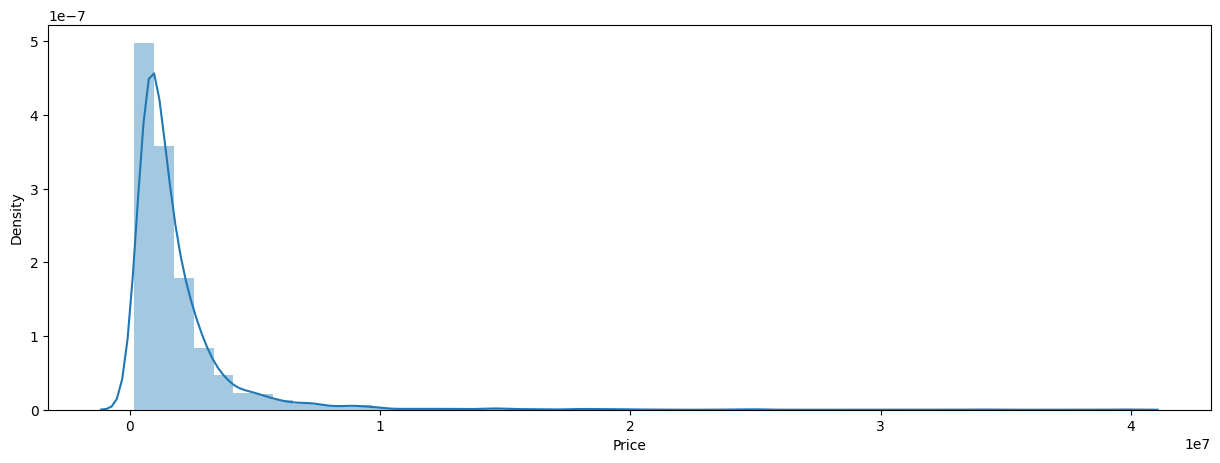

In [10]:
plt.figure(figsize=(15,5))
sns.distplot(df['Price'])

# seleksi fitur

In [11]:
features = ['Area in sq ft','Bedrooms','Bathrooms']
x = df[features]
y = df['Price']
x.shape, y.shape

((3480, 3), (3480,))

# split data training dan data testing

In [12]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(870,)

# membuat model regresi linier

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [14]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.5882505306054877


# membuat inputan model regresi linier

In [16]:
#Area in sq ft, Bedrooms, Bathrooms
input_data = np.array([[778,2,2]])

prediction = lr.predict(input_data)
print('Estimasi harga rumah dalam Pound Sterling :', prediction)

Estimasi harga rumah dalam Pound Sterling : [942099.37519362]


C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [21]:
import pickle

filename = 'estimasi_harga_rumah.sav'
pickle.dump(lr,open(filename,'wb'))